## Creating a Skip Gram Model


In [32]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
#Loading the dataset
s = " "
lines = []
with open('shakespeare.txt', 'r') as f:
    for l in f:
        l = l.replace("\n","")
        lines.append(l)
    print(lines[:10])
    lines = s.join(lines)
print(lines)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
tokenized_text = word_tokenize(lines.lower())
vector_size = 100
window_size = 5
model = Word2Vec(sentences=[tokenized_text], vector_size=vector_size, window=window_size, sg=1, min_count=1, workers=4)
model.save("skipgram_model.bin")

## Testing the Acccuracy of this Model

In [26]:
import gensim
from gensim.models import Word2Vec
from nltk.data import find
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
wordsim_path = 'combined.csv'
word_sim_data = pd.read_csv(wordsim_path)

In [35]:
def cosine_similarity_word_vectors(word1, word2):
    try:
        return cosine_similarity([model.wv[word1]], [model.wv[word2]])[0][0]
    except KeyError:
        print(f"Word '{word1}' or '{word2}' not present in the vocabulary.")
        return 0.0

In [38]:
predicted_similarities = [cosine_similarity_word_vectors(w1, w2) for w1, w2 in zip(word_sim_data['Word 1'], word_sim_data['Word 2'])]
human_similarities = word_sim_data['Human (mean)'].astype(float)

Word 'computer' or 'keyboard' not present in the vocabulary.
Word 'computer' or 'internet' not present in the vocabulary.
Word 'plane' or 'car' not present in the vocabulary.
Word 'telephone' or 'communication' not present in the vocabulary.
Word 'television' or 'radio' not present in the vocabulary.
Word 'media' or 'radio' not present in the vocabulary.
Word 'cucumber' or 'potato' not present in the vocabulary.
Word 'professor' or 'doctor' not present in the vocabulary.
Word 'student' or 'professor' not present in the vocabulary.
Word 'stock' or 'phone' not present in the vocabulary.
Word 'stock' or 'CD' not present in the vocabulary.
Word 'stock' or 'jaguar' not present in the vocabulary.
Word 'professor' or 'cucumber' not present in the vocabulary.
Word 'bishop' or 'rabbi' not present in the vocabulary.
Word 'Jerusalem' or 'Israel' not present in the vocabulary.
Word 'Jerusalem' or 'Palestinian' not present in the vocabulary.
Word 'fuck' or 'sex' not present in the vocabulary.
Word 

In [39]:
pearson_corr, _ = spearmanr(predicted_similarities, human_similarities)
print(f"Pearson Correlation: {pearson_corr:.4f}")

Pearson Correlation: 0.0368


In [40]:
spearman_corr, _ = spearmanr(predicted_similarities, human_similarities)
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")

Spearman Rank Correlation: 0.0368


In [41]:
def evaluate_analogy(word1, word2, word3, expected_word):
    result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=1)
    predicted_word = result[0][0]
    print(f"Analogy: {word1} is to {word2} as {word3} is to {predicted_word}. Expected: {expected_word}")

In [42]:
evaluate_analogy('man', 'woman', 'king', 'queen')

Analogy: man is to woman as king is to men. Expected: queen


In [47]:
def visualize_word_embeddings(words):
    word_vectors = [model.wv[word] for word in words]
    word_vectors_array = np.array(word_vectors)

    tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)
    embeddings_2d = tsne_model.fit_transform(word_vectors_array)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = embeddings_2d[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), alpha=0.5)

    plt.show()

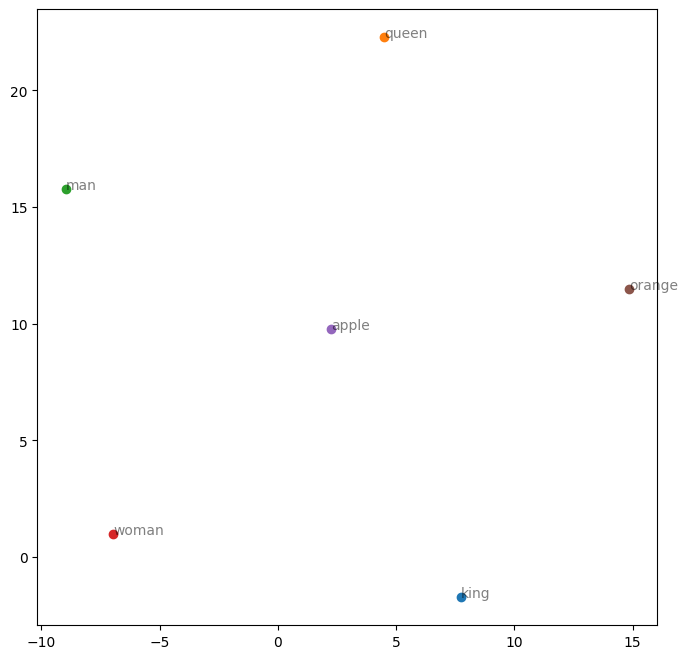

In [48]:
visualize_word_embeddings(['king', 'queen', 'man', 'woman', 'apple', 'orange'])